In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import colors
import textwrap
import matplotlib.cm as cm

from utils import preprocess
from utils import plots
 
plots.set_plotting_style()

In [3]:
df_hormones = preprocess.load_hormones_data()

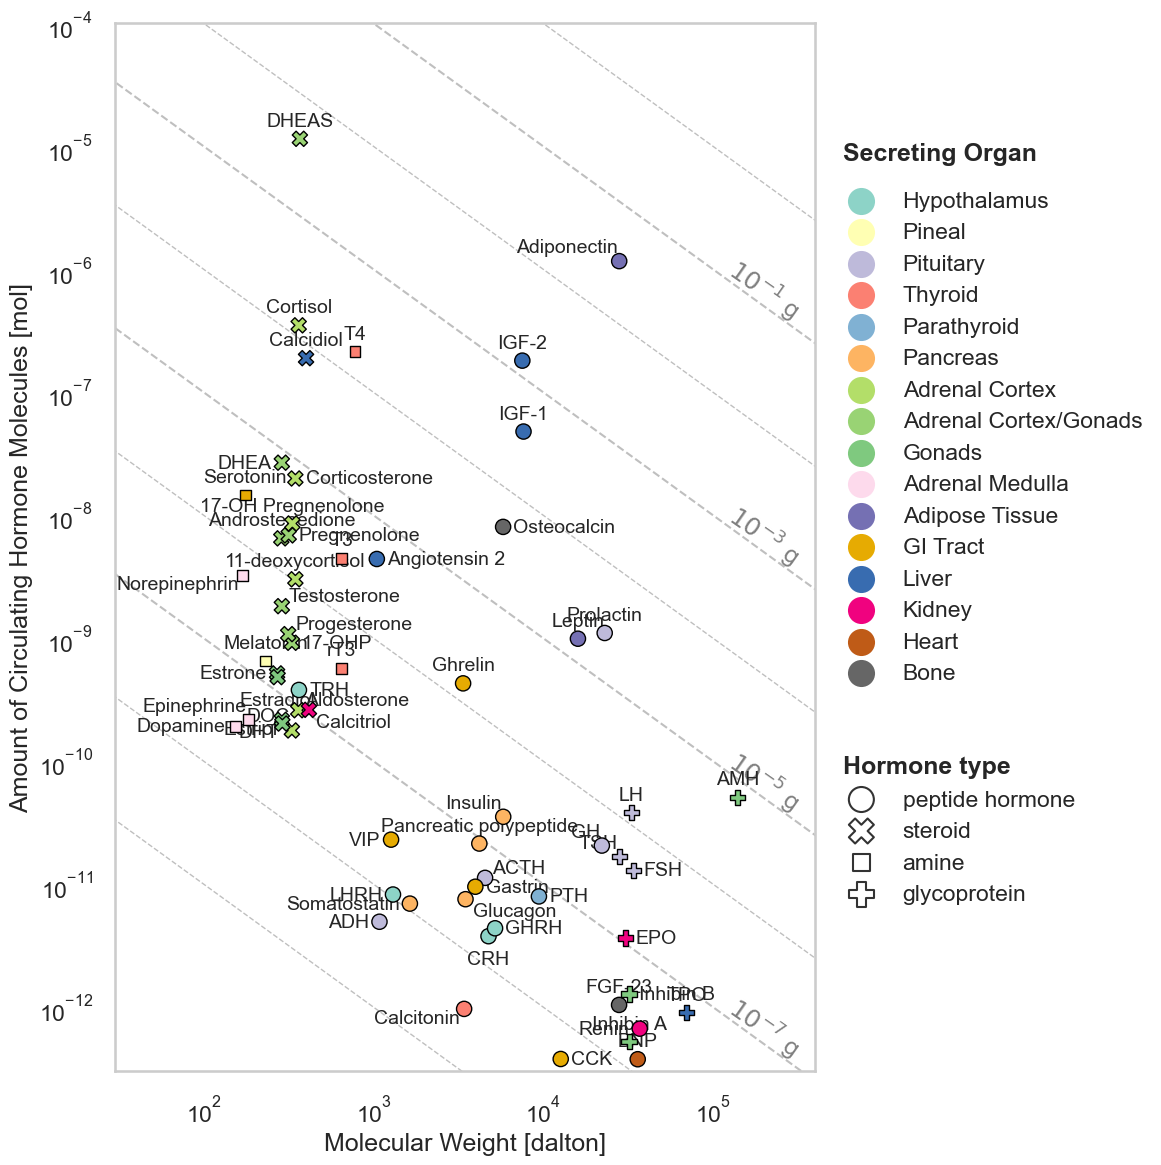

In [4]:
plots.plot_moles_vs_mw_by_organ(
    df_hormones=df_hormones,
    sex="female",
)

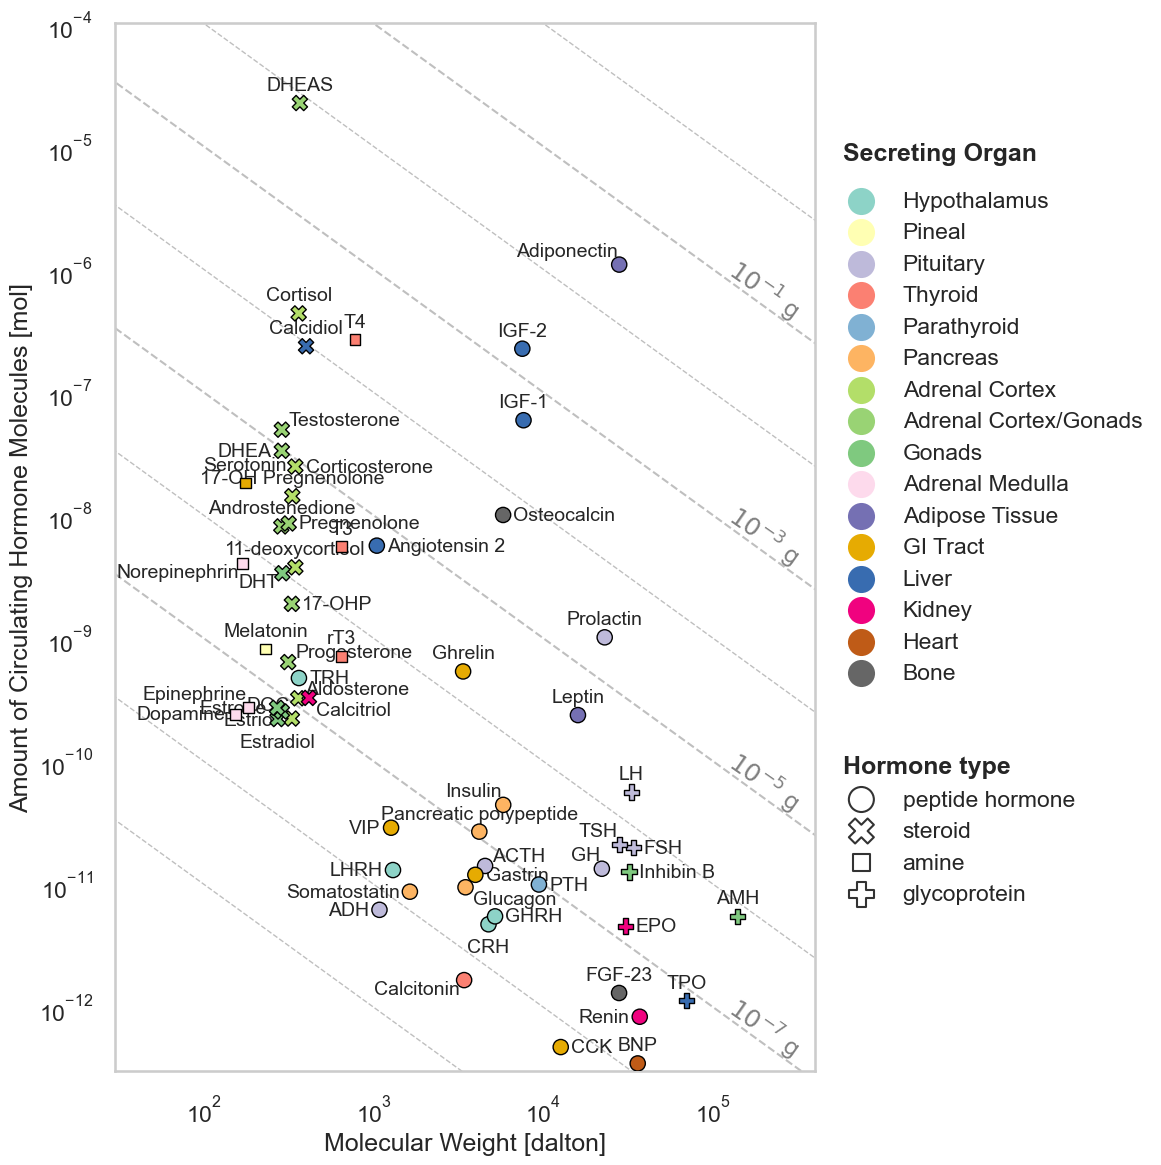

In [5]:
plots.plot_moles_vs_mw_by_organ(
    df_hormones=df_hormones,
    sex="male",
)

In [11]:
df_hormones = pd.read_excel(
    "hormones_database.xlsx",
    sheet_name='Database of clinically assayed ',
    skiprows=1,
    skipfooter=5,
    index_col="Label",
)
df_hormones.columns = df_hormones.columns.str.replace(".1", "_female")

In [12]:
df_hormones.head()

Hormone primary name condition/modifier  \
Label                                                                 
Adiponectin                          Adiponectin                NaN   
Leptin                                    Leptin                NaN   
DOC                 11-deoxycorticosterone (DOC)                NaN   
11-deoxycortisol                11-deoxycortisol                NaN   
17-OH Pregnenolone            17-OH Pregnenolone                NaN   

                                Additional names     Key System   \
Label                                                              
Adiponectin         GBP-28, apM1, AdipoQ, ACRP30      Adipokines   
Leptin              Obesity Hormone, Fat Hormone      Adipokines   
DOC                         Desoxycorticosterone  Adrenal cortex   
11-deoxycortisol    Compound S, 11-Deoxycortisol  Adrenal cortex   
17-OH Pregnenolone        17-Hydroxypregnenolone  Adrenal cortex   

                              Test Name hormone_state  for_ref_male  \
Label                                                                 
Adiponectin                 Adiponectin           NaN           1.0   
Leptin                           Leptin           NaN           1.0   
DOC                 Deoxycorticosterone           NaN           1.0   
11-deoxycortisol       11-deoxycortisol           NaN           1.0   
17-OH Pregnenolone   17-OH-Pregnenolone           NaN           1.0   

                    Distinct hormones  Molecular weight (dalton)  \
Label                                                              
Adiponectin                       1.0                  28000.000   
Leptin                            1.0                  16000.000   
DOC                               1.0                    330.461   
11-deoxycortisol                  1.0                    346.500   
17-OH Pregnenolone                1.0                    332.500   

                   Primarily secreted from: organ  ... units_female  \
Label                                              ...                
Adiponectin                       Adipose Tissue   ...        ug/ml   
Leptin                             Adipose Tissue  ...        ng/ml   
DOC                                Adrenal Cortex  ...          NaN   
11-deoxycortisol                   Adrenal Cortex  ...          NaN   
17-OH Pregnenolone                 Adrenal Cortex  ...        ng/dl   

                   min_pg_ml_female max_pg_ml_female  geomean_pg_ml_female  \
Label                                                                        
Adiponectin               5000000.0       37000000.0          1.360147e+07   
Leptin                       2800.0          15600.0          6.609085e+03   
DOC                             NaN              NaN          2.449490e+01   
11-deoxycortisol                NaN              NaN          4.354308e+02   
17-OH Pregnenolone            310.0           4550.0          1.187645e+03   

                    total_ug_female total_ug for sum  total_g_female  \
Label                                                                  
Adiponectin            32643.529220     32643.529220    3.264353e-02   
Leptin                    15.861803        15.861803    1.586180e-05   
DOC                        0.058788         0.058788    5.878775e-08   
11-deoxycortisol           1.045034         1.045034    1.045034e-06   
17-OH Pregnenolone         2.850347         2.850347    2.850347e-06   

                    moles_circulating_hormones_female  \
Label                                                   
Adiponectin                              1.165840e-06   
Leptin                                   9.913627e-10   
DOC                                      1.778962e-10   
11-deoxycortisol                         3.015971e-09   
17-OH Pregnenolone                       8.572473e-09   

                    num_circulating_molecules_female  Ref for steady states  
Label                                             

In [10]:
df_hormones.head(2)

Hormone primary name condition/modifier  \
Label                                                 
Adiponectin          Adiponectin                NaN   
Leptin                    Leptin                NaN   

                         Additional names Key System     Test Name  \
Label                                                                
Adiponectin  GBP-28, apM1, AdipoQ, ACRP30  Adipokines  Adiponectin   
Leptin       Obesity Hormone, Fat Hormone  Adipokines       Leptin   

            hormone_state  for_ref_male  Distinct hormones  \
Label                                                        
Adiponectin           NaN           1.0                1.0   
Leptin                NaN           1.0                1.0   

             Molecular weight (dalton) Primarily secreted from: organ  ...  \
Label                                                                  ...   
Adiponectin                    28000.0                Adipose Tissue   ...   
Leptin                         16000.0                 Adipose Tissue  ...   

            units_female min_pg_ml_female max_pg_ml_female  \
Label                                                        
Adiponectin        ug/ml        5000000.0       37000000.0   
Leptin             ng/ml           2800.0          15600.0   

             geomean_pg_ml_female  total_ug_female total_ug for sum  \
Label                                                                 
Adiponectin          1.360147e+07     32643.529220     32643.529220   
Leptin               6.609085e+03        15.861803        15.861803   

             total_g_female  moles_circulating_hormones_female  \
Label                                                            
Adiponectin        0.032644                       1.165840e-06   
Leptin             0.000016                       9.913627e-10   

             num_circulating_molecules_female  Ref for steady states  
Label                                                                 
Adiponectin                      7.020690e+17                    NaN  
Leptin                           5.969986e+14                    NaN  

[2 rows x 38 columns]

In [13]:

N_avog = 6.022*10**23
suffixes = dict(zip(["female", "male"], ["_female", ""]))
for sex, suff in suffixes.items():
    df_hormones[f"moles_circulating_hormones{suff}"] =df_hormones[f"moles_circulating_hormones{suff}"]/N_avog
# mod_df['moles_circulating_hormones'] = mod_df['num_circulating_molecules']/N_avog


In [5]:
# mod_df = pd.read_excel(
#     "hormones_database.xlsx",
#     sheet_name='Database of clinically assayed ',
#     skiprows=1,
#     skipfooter=3,
#     index_col="Hormone primary name",
# )
# mod_df = mod_df[mod_df.for_scatter == 1]
# mod_df = mod_df[mod_df["total_ug"] > 0]
# mod_df.head()

In [3]:
N_avog = 6.022*10**23
mod_df['moles_circulating_hormones'] = mod_df['num_circulating_molecules']/N_avog

C:\Users\Ron Sender\AppData\Local\Temp\ipykernel_5580\4048644166.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [5]:
# mod_df['Primarily secreted from: organ'].value_counts()
mod_df['Secreting Organ'] = mod_df['Primarily secreted from: organ'].str.replace(' Gland', '').str.strip()
organ_order = ['Hypothalamus', 'Pineal', 'Pituitary', 'Thyroid',  'Parathyroid', 'Pancreas', 'Adrenal Cortex', 'Adrenal Cortex/Gonads', 'Gonads', 
               'Adrenal Medulla', 'Adipose Tissue', 'GI Tract', 'Liver', 'Kidney', 'Heart', 'Bone']
# set(organ_order) - set(mod_df['Secreting Organ'])
# mod_df['Secreting Organ'].value_counts().loc[organ_order]

In [6]:
def RBG_to_string(c_lis):
    if type(c_lis) == str:
        # print(c_lis)
        c_lis = colors.to_rgb(c_lis)
    return 'rgb{}'.format(tuple((256*np.array(c_lis)).round(0).astype(int)))


In [7]:
cl1 = sns.color_palette('Set3', n_colors=7).as_hex()
cl2 = ['#99d374', '#7fc97f',  '#fddaec', '#7570b3', '#e6ab02' ,
       '#386cb0', '#f0027f', '#bf5b17', '#666666']

color_dict = dict(zip(organ_order, cl1 + cl2))
sec_org_color_dict = {org: RBG_to_string(color_dict[org]) for org in color_dict.keys()}
# sec_org_color_dict 
mod_df['color']= mod_df['Secreting Organ'].map(sec_org_color_dict)
mod_df[['Secreting Organ','color']].to_csv('sec_organ_colors.csv')

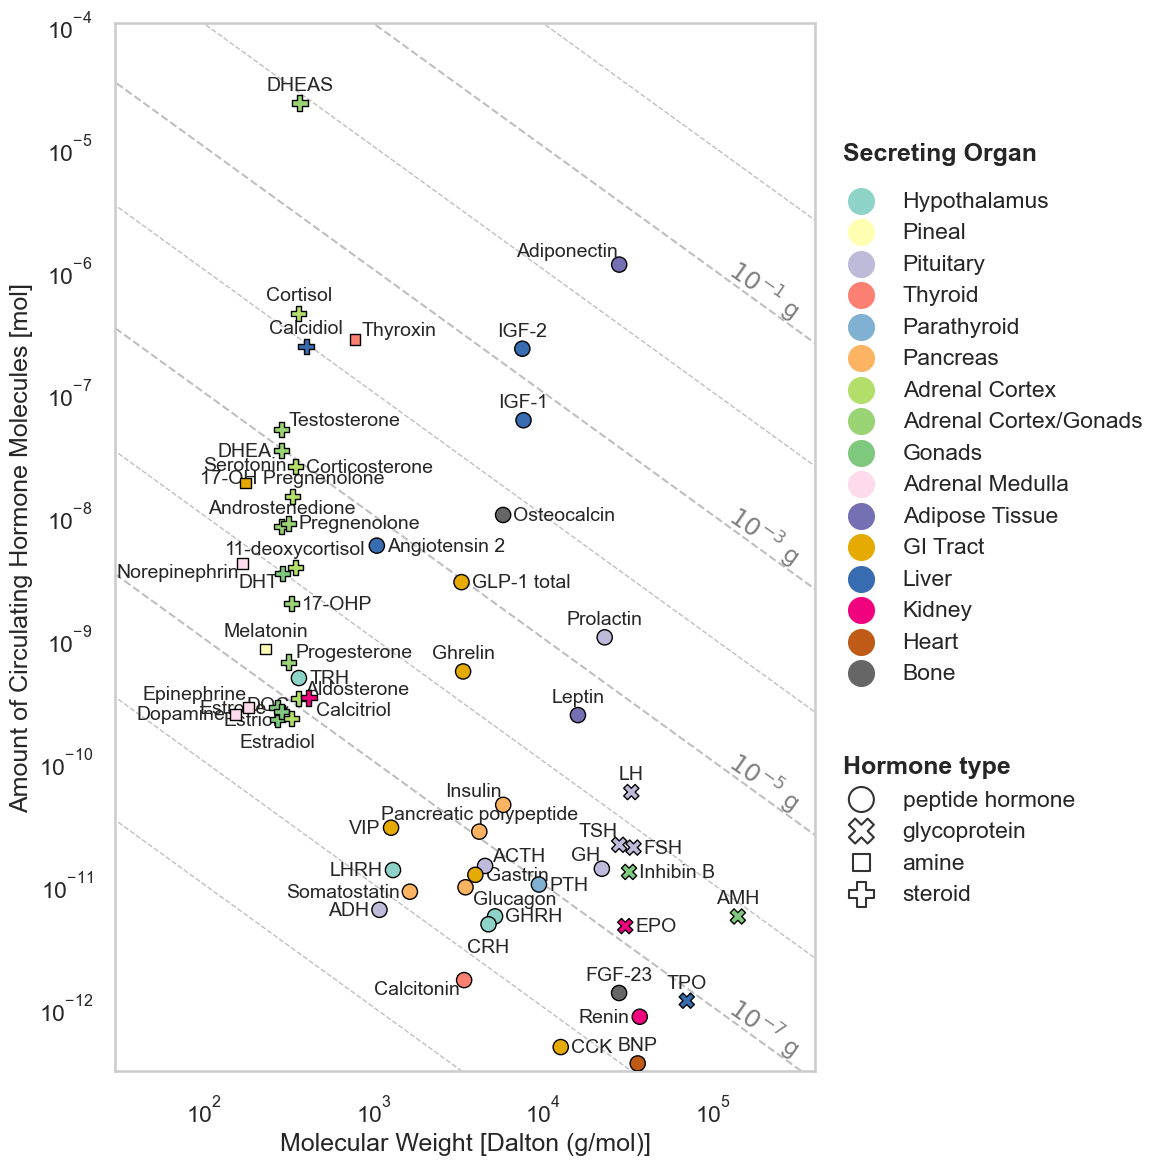

In [9]:
plt.figure(figsize=(12, 12))
ax = plt.gca()
y_par = "moles_circulating_hormones"
sns.scatterplot(
    data=mod_df,
    x="Molecular weight (dalton)",
    y=y_par,
    hue="Secreting Organ",
    hue_order=organ_order,
    style="Hormone type",
    s=120,
    edgecolor="k",
    linewidth=1,
    zorder=10,
    ax=ax,
    palette=color_dict,
)

# ax.set_xlim(0.8 * 10**2, 4 * 10**5)
ax.set_xlim(0.3 * 10**2, 4 * 10**5)
ax.set_ylim(3 * 10**-13, 10**-4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_yticks(np.logspace(-12, -4, 9))
x_lims = np.array([0, 9])
x = 10**x_lims
x_lbl = 2 * 10**5
for tot in np.logspace(0, -9, 10):
    lw = 1
    if (np.log10(tot) % 2 != 0) & (np.log10(tot) != -9):
        lw = 1.5
        y_lbl = tot / x_lbl * 0.8
        ax.text(
            x_lbl,
            y_lbl,
            r"$10^{{{}}}$ g".format(int(np.log10(tot))),
            rotation=325,
            ha="center",
            color="grey",
        )
    ax.plot(x, tot / x, ls="--", c="grey", alpha=0.5, lw=lw)

hands, labs = ax.get_legend_handles_labels()
n_type = len(mod_df["Hormone type"].unique())
h = hands[1 : -n_type - 1]
l = labs[1 : -n_type - 1]
emp_h = Line2D(
    [0],
    [0],
    marker="o",
    mec="k",
    mew=0.5,
    color="grey",
    alpha=0.5,
    markersize=0,
    ls="None",
)
h += [emp_h] * 3
l += [""] * 3
h += hands[-n_type:]
l += labs[-n_type:]
for i in range(len(h) - n_type, len(h)):
    h[i].set_facecolor("none")
plt.legend(
    handles=h,
    labels=l,
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    borderaxespad=0,
    markerscale=2,
)
ax.text(
    x=1.04,
    y=0.87,
    s=labs[0],
    fontsize=18,
    fontweight="bold",
    transform=ax.transAxes,
)
ax.text(
    x=1.04,
    y=0.285,
    s=labs[-n_type - 1],
    fontsize=18,
    fontweight="bold",
    transform=ax.transAxes,
)


fac_x_dict = {
    "default": 1,
    "lower_left": 0.95,
    "lower_right": 1.1,
    "right": 1.15,
    "bottom": 1,
    "upper_left": 0.98,
    "left": 0.87,
    "upper_right": 1.1,
}
fac_y_dict = {
    "default": 1.4,
    "lower_left": 0.85,
    "lower_right": 0.8,
    "right": 1,
    "bottom": 0.65,
    "upper_left": 1.3,
    "left": 1,
    "upper_right": 1.2,
}
ha_dict = {
    "default": "center",
    "lower_left": "right",
    "lower_right": "left",
    "right": "left",
    "bottom": "center",
    "upper_left": "right",
    "left": "right",
    "upper_right": "left",
}
loc_dict = dict(
    lower_left=[
        "Calcitonin",
        "Norepinephrin",
        "DHT",
        "Estriol",
    ],
    upper_left=[
        "Adiponectin",
        "Epinephrine",
        "DOC",
        "17-OH-Pregnenolone",
        "TSH",
        "GH",
        "Insulin",
    ],
    lower_right=["Calcitriol", "Glucagon"],
    right=[
        "FSH",
        "Corticosterone",
        "GLP-1 active",
        "PTH",
        "CCK",
        "17-OHP",
        "Inhibin B",
        "Pregnenolone",
        "BhCG",
        "Gastrin",
        "GLP-1 total",
        "Angiotensin 2",
        "EPO",
        "TRH",
        "Osteocalcin",
        "GHRH",
    ],
    upper_right=["Progesterone", "Thyroxin", "Testosterone", "ACTH", "Aldosterone",],
    left=[
        "Somatostatin",
        "VIP",
        "ADH",
        "11-Deoxycorticosterone",
        "Androstendione",
        "11-Deoxycortisol",
        "Estrone",
        "Dopamine",
        "FGF23",
        "DHEA",
        "Renin",
        "LHRH",
    ],
    bottom=[
        "Estradiol",
        "CRH",
    ],
)
for hr in mod_df.index:
    fac_x, fac_y = fac_x_dict["default"], fac_y_dict["default"]
    ha = ha_dict["default"]
    for loc in loc_dict.keys():
        if mod_df.loc[hr, "Label"] in loc_dict[loc]:
            fac_x, fac_y = fac_x_dict[loc], fac_y_dict[loc]
            ha = ha_dict[loc]
    x_txt = mod_df.loc[hr, "Molecular weight (dalton)"] * fac_x
    y_txt = mod_df.loc[hr, y_par] * fac_y

    plt.text(
        x=x_txt, y=y_txt, s=mod_df.loc[hr, "Label"], va="center", ha=ha, fontsize=14
    )
plt.grid()
ax.set_xlabel("Molecular Weight [Dalton (g/mol)]")
ax.set_ylabel("Amount of Circulating Hormone Molecules [mol]")
plt.tight_layout()
plt.savefig("Figures/moles_vs_MW_by_organ_.png", dpi=600)
plt.savefig("Figures/moles_vs_MW_by_organ.svg", dpi=600)

### Histograms of the molecular weight.
A. Molectular weight, weighted by the number of molecules of the circulating hormones. Circulating hormones were binned according to their molecular weight. For each bin the total molarity of hormones within the bin was then calculated and presented.

B. Molectular weight, weighted by the total mass of the circulating hormones. Circulating hormones were binned according to their molecular weight. For each bin the total mass of hormones within the bin was then calculated and presented.

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 7)

xlim = (5 * 10**1, 10**5)
ylims = [np.array([-12.0, -4]), np.array([-8.0, 0])]
y_labels = [
    "Molarity of circulating hormones of each\nmolecular weight range",
    "Total mass of circulating hormones of each\nmolecular weight range [g]",
]
colors = ["C0", "C1"]
labels = "AB"
x_par = 'Molecular weight (dalton)'
for i, par in enumerate([y_par, "total_g"]):
    ax = axes[i]
    ax.hist(
    x=mod_df[x_par],
    bins=np.logspace(2, 5, 10),
    weights=mod_df[par],
    histtype='step',
    lw=1.5,
    alpha=0.8,
    color=colors[i]
    )
    ax.hist(
        x=mod_df[x_par],
        bins=np.logspace(2, 5, 10),
        weights=mod_df[par],
        histtype='stepfilled',
        alpha=0.4,
        color=colors[i],
    )
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(x_par)
    ax.set_ylabel(y_labels[i])
    ax.set_xlim(xlim)
    ax.set_ylim(10 ** ylims[i])
    ax.set_yticks(np.logspace(ylims[i][0], ylims[i][1], 5))
    ax.text(10, 1.1 * 10 ** (ylims[i][1]), labels[i])
fig.tight_layout()
fig.savefig("Figures/Hist_panels.png", dpi=300)


## Creating treemap for Voronoi diagram

In [10]:
mod_df = pd.read_excel(
    "database.xlsx",
    sheet_name="Database of clinically assayed ",
    skiprows=1,
    skipfooter=3,
    index_col="Hormone primary name",
)
mod_df = mod_df[mod_df.for_ref_person == 1]
# mod_df = mod_df[mod_df['total_ug'] > 0]
mod_df["Secreting Organ"] = (
    mod_df["Primarily secreted from: organ"].str.replace(" Gland", "").str.strip()
)
mod_df["color"] = mod_df["Secreting Organ"].map(sec_org_color_dict)
# mod_df[['Secreting Organ','color']].to_csv('sec_organ_colors.csv')
# mod_df.head()

In [16]:
mod_df.sort_index().head(20)

condition/modifier  \
Hormone primary name                                 
11-deoxycorticosterone (DOC)                   NaN   
11-deoxycortisol                               NaN   
17-OH Pregnenolone                             NaN   
17-OH Progesterone            female -  follicular   
ACTH                                           NaN   
ADH                                            NaN   
AMH                                            NaN   
Adiponectin                                    NaN   
Aldosterone                                    NaN   
Androstenedione                                NaN   
Angiotensin 2                                  NaN   
BNP                                            NaN   
CCK                                            NaN   
CRH                                            NaN   
Calcidiol                                      NaN   
Calcitonin                                     NaN   
Calcitriol                                     NaN   
Corticosterone                                 NaN   
Cortisol                                      p.m.   
DHEA                                           NaN   

                                                               Additional names  \
Hormone primary name                                                              
11-deoxycorticosterone (DOC)                               Desoxycorticosterone   
11-deoxycortisol                                   Compound S, 11-Deoxycortisol   
17-OH Pregnenolone                                       17-Hydroxypregnenolone   
17-OH Progesterone                                       17-Hydroxyprogesterone   
ACTH                                 Adrenocorticotropic Hormone, Corticotropin   
ADH                                           Antidiuretic Hormone, Vasopressin   
AMH                                                      Anti-Müllerian Hormone   
Adiponectin                                        GBP-28, apM1, AdipoQ, ACRP30   
Aldosterone                                                                 NaN   
Androstenedione                     Androst-4-ene-3,17-dione, 4-Androstenedione   
Angiotensin 2                                                    Angiotensin II   
BNP                                                  B-type Natriuretic Peptide   
CCK                                                             Cholecystokinin   
CRH                             Corticotropin-Releasing Hormone, Corticoliberin   
Calcidiol                     25-Hydroxycholecalciferol, 25-Hydroxyvitamin D...   
Calcitonin                                                      Thyrocalcitonin   
Calcitriol                    1,25-Dihydroxycholecalciferol, 1,25-Dihydroxyv...   
Corticosterone                Compound B, 11β,21-Dihydroxypregn-4-ene-3,20-d...   
Cortisol                                                                    NaN   
DHEA                                                     Dehydroepiandrosterone   

                                                     Key System   \
Hormone primary name                                               
11-deoxycorticosterone (DOC)                      Adrenal cortex   
11-deoxycortisol                                  Adrenal cortex   
17-OH Pregnenolone                                Adrenal cortex   
17-OH Progesterone                                Adrenal cortex   
ACTH                          Adrenal cortex (central regulator)   
ADH                                                    Pituitary   
AMH                                                 Reproductive   
Adiponectin                                           Adipokines   
Aldosterone                                       Adrenal cortex   
Androstenedione                                   Adrenal cortex   
Angiotensin 2                                                RAS   
BNP                                               Cardiovascular   
CCK                                              Enteroendocrine

In [ ]:

def add_to_color(c, n, fac=5):
    n = int(n)
    new_c = np.minimum(256,np.array(c[4:-1].split(', ')).astype(int) + n*fac)
    return 'rgb({}, {}, {})'.format(new_c[0], new_c[1], new_c[2])

In [ ]:
for_vor = mod_df[["Secreting Organ", "color"]]
for_vor = for_vor.dropna().sort_values("Secreting Organ")
for_vor = for_vor.reset_index().rename(columns={'Hormone primary name': "Name",})
for_vor = for_vor[["Secreting Organ", "Name", "color"]]
for_vor = for_vor.sort_values(["Secreting Organ", "Name"], ascending=True)

for_vor["order"] = range(1, for_vor.shape[0] + 1)
for_vor
for_vor["repeats"] = list(
    itertools.chain.from_iterable(
        [list(range(k)) for k in for_vor["Secreting Organ"].value_counts().sort_index()]
    )
)
for_vor["color2"] = for_vor.apply(lambda rw: add_to_color(rw.color, rw.repeats), axis=1)

for sec_org in for_vor["Secreting Organ"].unique():
    for_vor = pd.concat(
        [
            for_vor,
            pd.DataFrame(
                {
                    "Secreting Organ": sec_org,
                    "Name": "000000",
                    "color": sec_org_color_dict[sec_org],
                    "color2": sec_org_color_dict[sec_org],
                },
                index=[0],
            ),
        ]
    ).reset_index(drop=True)
for_vor = for_vor.sort_values(["Secreting Organ", "Name"], ascending=True)

for_vor["label"] = for_vor.apply(
    lambda row: np.nan
    if row.Name == "000000"
    else "{}: c{:0.0f}".format(row.Name, row.order),
    axis=1,
)
for_vor.loc[for_vor.Name == "000000", "Name"] = np.nan
for_vor["Hormone"] = "Hormone"
for_vor = for_vor.set_index("Hormone")
for_vor["c"] = ''
for_vor.loc[~for_vor.order.isnull(), "c"] = "c" + for_vor.loc[
    ~for_vor.order.isnull(), "order"
].astype(int).astype(str)
col_order = ["Secreting Organ", "label", "color2", "Name", "c"]
for_vor = for_vor[col_order]
for_vor.to_csv("Tree_for_voroni.csv")

In [ ]:
# vals_vor = mod_df.set_index('c')
# vals_vor
# mod_df.index[mod_df.index.duplicated()]
mod_df.columns

In [ ]:
mod_df

In [ ]:
mod_df['c'] = mod_df.index.map(dict(zip(for_vor.Name,for_vor.c)))
mod_df['order'] = mod_df.c.map(lambda s: int(s.split('c')[1]))
mod_df = mod_df.sort_values('order')
cols_dict = {'total_ug':'mass_male', 'total_ug.1':'mass_female', 'moles_circulating_hormones':'moles_male', 'moles_circulating_hormones.1':'moles_female'}
factors = [0.01, 0.01, 10**9, 10**9]
vals_vor = mod_df.set_index('c').rename(columns=cols_dict)
fname = 'Voronoi.xlsx'
with pd.ExcelWriter(fname) as writer:
    for_vor.to_excel(writer, sheet_name='Tree')
    for i, col in enumerate(cols_dict.values()):
        (vals_vor[col]*factors[i]).to_excel(writer, sheet_name=col)